In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 준비
credit_df = pd.read_csv('data-files/credit_train2.csv', encoding='utf-8')

In [3]:
# 데이터 확인
credit_df.info()
credit_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
credit_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [5]:
# 데이터 백업
credit_df_backup = credit_df.copy()

In [6]:
# 데이터 탐색 1

# credit_df['Loan Status'].head(10)
credit_df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [7]:
# 데이터 탐색 2-1

# credit_df['Credit Score'].head(10)
# credit_df['Credit Score'].isnull().sum() / credit_df.shape[0] # missing value ratio
credit_df['Credit Score'].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

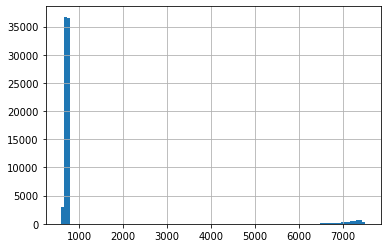

In [8]:
# 데이터 탐색 2-2
credit_df['Credit Score'].hist(bins=100)
plt.show()

In [9]:
# 데이터 탐색 2-3
credit_df[ credit_df['Credit Score'] > 751 ]['Credit Score'].min() # Credit Score가 751보다 큰 데이터 중에서 Credit Score의 최소값

5850.0

In [10]:
# 참고 map vs apply

# credit_df_backup['Credit Score'].describe()
credit_df_backup['Credit Score'].map(lambda val: (val / 10) if val > 751 else val).describe() # map : Series 전용

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [11]:
# Credit Score 속성 데이터 전처리 
credit_df['Credit Score'] = credit_df['Credit Score'].apply(lambda val: (val / 10) if val > 751 else val) # Credit Score가 751보다 크면 10으로 나눈 값을 사용 , apply : DataFrame

NameError: name '용' is not defined

In [26]:
# Credit Score 데이터 확인
credit_df['Credit Score'].describe()

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

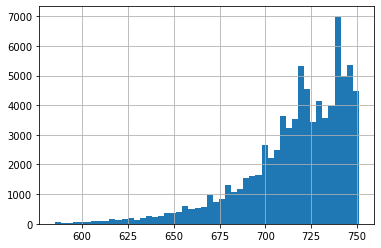

In [27]:
# Credit Score 데이터 확인
credit_df['Credit Score'].hist(bins=50)
plt.show()

In [33]:
# missing value 확인

print( credit_df['Loan Status'].isna().sum() ) # missing value count
print( credit_df['Loan Status'].isna().sum() / credit_df.shape[0] ) # missing value ratio

514
0.005113715502318085


In [34]:
# missing value 처리 (행 삭제)

credit_df.dropna(subset=['Loan Status'], inplace=True) # Loan Status 컬럼의 값이 missing value인 행 제거 (원본에 적용)

In [35]:
# 제거 후 missing value 확인

print( credit_df['Loan Status'].isna().sum() ) # missing value count
print( credit_df['Loan Status'].isna().sum() / credit_df.shape[0] ) # missing value ratio

0
0.0


In [38]:
# Loan Status 범주형 인코딩

print( credit_df['Loan Status'].value_counts() )

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
credit_df['Loan Status'] = le.fit_transform(credit_df['Loan Status'])

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64


In [40]:
# Loan Status 범주형 인코딩 확인
print( credit_df['Loan Status'].value_counts() )

credit_df['Loan Status'] = credit_df['Loan Status'].map(lambda v: 0 if v == 1 else 1) # charged off에 1을 부여하는 방식으로 변경

print( credit_df['Loan Status'].value_counts() )

1    77361
0    22639
Name: Loan Status, dtype: int64
0    77361
1    22639
Name: Loan Status, dtype: int64


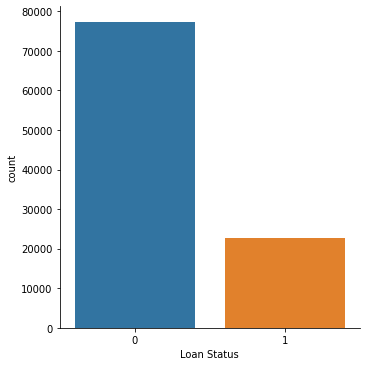

In [41]:
# Loan Status 범주형 인코딩 확인

sns.catplot(data=credit_df, x='Loan Status', kind="count")
plt.show()

In [44]:
# 데이터 탐색 (Term)

# credit_df['Term'].head()
# credit_df['Term'].isna().sum() # missing value 확인
# credit_df['Term'].value_counts()

0

In [45]:
# Term 속성의 값을 범주형 인코딩

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# credit_df['Term'] = le.fit_transform(credit_df['Term'])
# credit_df['Term'] = credit_df['Term'].map(lambda v : 0 if v == 1 else 1)

credit_df['Term'].replace(('Short Term', 'Long Term'), (0, 1), inplace=True)

0    72208
1    27792
Name: Term, dtype: int64


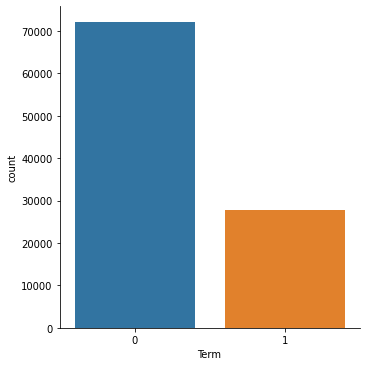

In [47]:
# Term 속성의 범주형 인코딩 확인

print( credit_df['Term'].value_counts() )

sns.catplot(data=credit_df, x='Term', kind="count")
plt.show()

In [ ]:
# 여기까지 적용된 내용으로 새로운 백업 생성

credit_df_backup2 = credit_df.copy()

In [50]:
# Credit Score 속성의 missing value 확인

# credit_df['Credit Score'].head()
print( credit_df['Credit Score'].isna().sum() )
credit_df['Credit Score'].isna().sum() / credit_df.shape[0]

19154


0.19154

In [57]:
# 차원 변경 테스트 코드 (1차원 ndarray -> 2차원 ndarray)
print( credit_df['Credit Score'].values )
print( credit_df['Credit Score'].values.reshape(-1, 1)) # reshape(-1, 1) : n행 1열의 2차원 데이터로 변경

[709.  nan 741. ... 742. 746. 743.]
[[709.]
 [ nan]
 [741.]
 ...
 [742.]
 [746.]
 [743.]]


In [58]:
# Credit Score 속성의 missing value 대체

# 1-1. 전체 평균으로 대체
# credit_df['Credit Score'][ credit_df_backup2['Credit Score'].isna() ] = credit_df_backup2['Credit Score'].mean()

# 1-2. 전체 평균으로 대체
# from sklearn.impute import SimpleImputer

# print( SimpleImputer(strategy='mean').fit_transform(credit_df_backup2['Credit Score'].values.reshape(-1, 1)) ) # 테스트 코드
# credit_df['Credit Score'] = SimpleImputer(strategy='mean').fit_transform(credit_df_backup2['Credit Score'].values.reshape(-1, 1))

[[709.       ]
 [716.2934468]
 [741.       ]
 ...
 [742.       ]
 [746.       ]
 [743.       ]]


In [59]:
# Credit Score 속성의 missing value 대체 확인

credit_df['Credit Score'].isna().sum()

0

In [71]:
# Credit Score 속성의 missing value 대체

# Term 속성을 기준으로 Credit Score 평균 계산
sterm_credit_score_mean = credit_df.loc[credit_df_backup2['Term'] == 0, 'Credit Score'].mean() # short term의 credit score 평균 계산
lterm_credit_score_mean = credit_df.loc[credit_df_backup2['Term'] == 1, 'Credit Score'].mean() # long term의 credit score 평균 계산
print(sterm_credit_score_mean, lterm_credit_score_mean)

sterm_credit_score_na_rows = (credit_df_backup2['Term'] == 0) & (credit_df_backup2['Credit Score'].isna())
lterm_credit_score_na_rows = (credit_df_backup2['Term'] == 1) & (credit_df_backup2['Credit Score'].isna())
print(sterm_credit_score_na_rows.sum(), lterm_credit_score_na_rows.sum()) # 적용될 행의 갯수 확인

# missing value를  Term별 평균으로 대체
credit_df.loc[sterm_credit_score_na_rows, 'Credit Score'] = sterm_credit_score_mean
credit_df.loc[lterm_credit_score_na_rows, 'Credit Score'] = lterm_credit_score_mean

722.952395694434 698.9924471684376
0 0


In [75]:
# 문법 테스트 코드
abc = 10
'조건이 참일 때 사용하는 값' if abc != 10 else '조건이 거짓일 때 사용하는 값'

'조건이 거짓일 때 사용하는 값'

In [72]:
# 양적 데이터를 범주형 데이터로 변경 (Credit Score 컬럼에 대해 적용)

credit_df['Credit Score'] = credit_df['Credit Score'].map(lambda v: 'Poor' if v < 580 
                                                                           else 'Average' if v < 670 
                                                                                          else 'Good' if v < 740 
                                                                                                      else 'Very Good' if v < 800 
                                                                                                                       else 'Exceptional')

In [73]:
# 범주형 데이터로 변경한 내용 확인

credit_df['Credit Score'].value_counts()

Good         75506
Very Good    18479
Average       6015
Name: Credit Score, dtype: int64

In [86]:
# 범주형 데이터 인코딩 (세 개 이상의 범주 값이 있고 각 값은 서로 대등한 경우)

# 테스트 1
# from sklearn.preprocessing import OneHotEncoder

# # print( OneHotEncoder().fit_transform(credit_df['Credit Score'].values.reshape(-1, 1)) )
# OneHotEncoder().fit_transform( credit_df['Credit Score'].values.reshape(-1, 1) ).toarray()[:5]

# 테스트 2
# pd.get_dummies(credit_df['Credit Score'], drop_first=True).head() # drop_first : 3개의  범주 중에서 하나는 빼고 one-hot-encoding


# 적용
one_hot_encoded_credit_score = pd.get_dummies(credit_df['Credit Score'], drop_first=False)
credit_df = credit_df.join(one_hot_encoded_credit_score) # OneHotEncoded 처리한 데이터프레임과 원래 데이터프레임 결합

In [89]:
credit_df.rename(columns={ 'Good': 'Credit Good', 'Very Good': 'Credit Very Good', 'Average': 'Credit Average' }, inplace=True)
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Average,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,Good,1167493.0,8 years,Home Mortgage,Home Improvements,...,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,Good,NaN,10+ years,Home Mortgage,Debt Consolidation,...,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,0,Very Good,2231892.0,8 years,Own Home,Debt Consolidation,...,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0.0,0.0,1.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,Good,806949.0,3 years,Own Home,Debt Consolidation,...,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0.0,1.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,Good,NaN,5 years,Rent,Debt Consolidation,...,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0.0,1.0,0.0


In [90]:
credit_df.drop('Credit Score', axis=1, inplace=True)
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Average,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,...,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,...,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,...,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0.0,0.0,1.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,806949.0,3 years,Own Home,Debt Consolidation,8741.90,...,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0.0,1.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,NaN,5 years,Rent,Debt Consolidation,20639.70,...,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 여기까지의 작업을 파일에 저장

credit_df.to_csv('data-files/credit_train3.csv', index=False)